In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("mnist_train.csv")
df.rename(columns = {'5':'Res'},inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, Res to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
df[df['Res']==4].head()

,Res,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pic1 = df[19501:19502].values.reshape(785)[1:].reshape(28,28)

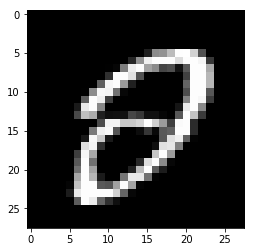

In [8]:
plt.imshow(pic1,cmap='gray')

In [9]:
pic2 = df[19:20].values.reshape(785)[1:].reshape(28,28)

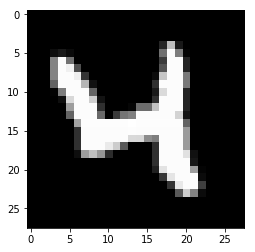

In [10]:
plt.imshow(pic2,cmap='gray')

In [11]:
import sklearn.neural_network as sknet
import sklearn.model_selection as skmodel

In [12]:
X_train, X_test, y_train, y_test = skmodel.train_test_split(df.drop('Res',axis=1), df['Res'], test_size=0.33, random_state=42)

In [14]:
model = sknet.MLPClassifier()

In [15]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
pred = model.predict(X_test)

In [17]:
pred[10:20]

array([2, 6, 5, 6, 0, 7, 8, 5, 0, 7], dtype=int64)

In [18]:
y_test[10:20]

53389    2
20118    6
5026     5
32239    6
52864    0
40783    7
52289    8
33246    5
19501    2
34046    7
Name: Res, dtype: int64

In [19]:
np.mean(pred != y_test)

0.04045454545454545

In [20]:
import sklearn.metrics as skmet

In [21]:
print(skmet.confusion_matrix(y_test,pred))

[[1876    1    4    0    3    6    7    1   27    4]
 [   1 2219    7    5    3    3    0    6   13    1]
 [   7    8 1874   15   15    1    3   20   14    2]
 [   0    4   46 1862    1   19    2   16    9   15]
 [   5    1    5    0 1894    3   11    3    6   37]
 [   6    5    1   49    1 1703   11    5   16   17]
 [   6    6    5    0   16   18 1921    1   17    3]
 [   2    9   20    8    7    0    0 1999    6    8]
 [   2   12   16   26    5   18    2    1 1859   14]
 [   3    6    5    5   35    8    1   24   15 1792]]


In [22]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1929
           1       0.98      0.98      0.98      2258
           2       0.95      0.96      0.95      1959
           3       0.95      0.94      0.94      1974
           4       0.96      0.96      0.96      1965
           5       0.96      0.94      0.95      1814
           6       0.98      0.96      0.97      1993
           7       0.96      0.97      0.97      2059
           8       0.94      0.95      0.94      1955
           9       0.95      0.95      0.95      1894

   micro avg       0.96      0.96      0.96     19800
   macro avg       0.96      0.96      0.96     19800
weighted avg       0.96      0.96      0.96     19800

